In [39]:
import tensorflow as tf
print(tf.__version__)

2.20.0


Classification Coriander 🌿 vs Parsley 🌿

In [40]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [41]:
import matplotlib.pyplot as plt

In [42]:
IMG_SIZE = (250, 250)
BATCH_SIZE = 32


upload dataset 

In [43]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\Admin\Desktop\qozber_maednos\train",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\Admin\Desktop\qozber_maednos\valid",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

class_names = train_ds.class_names
print("Classes :", class_names)


Found 638 files belonging to 2 classes.
Found 72 files belonging to 2 classes.
Classes : ['coriander', 'parsely']


Normalisation

In [44]:
normalization_layer = layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))


data augmentation

In [45]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

basemodel(MobileNetV2 🔥) : hada hwa l39L donc ghaywli sahl n3lmoh  

In [46]:
base_model = keras.applications.MobileNetV2(
    input_shape=(250, 250, 3),
    include_top=False,
    weights="imagenet"
)

base_model.trainable = False


C:\Users\Admin\AppData\Local\Temp\ipykernel_21860\1063350469.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = keras.applications.MobileNetV2(


Construire Modèle

In [47]:
model = keras.Sequential([
    data_augmentation,
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),  # ← Passe de 0.3 à 0.5
    layers.Dense(len(class_names), activation="softmax")
])


Compiler

In [48]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


Entrainer

In [50]:

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

# Dans model.fit, ajoute:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=[early_stopping]  
)


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.8197 - loss: 0.4166 - val_accuracy: 0.5694 - val_loss: 0.8512
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.8213 - loss: 0.3891 - val_accuracy: 0.6806 - val_loss: 0.6283
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 984ms/step - accuracy: 0.8589 - loss: 0.3354 - val_accuracy: 0.6944 - val_loss: 0.6298
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.8887 - loss: 0.2970 - val_accuracy: 0.6250 - val_loss: 0.9648
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 39s 973ms/step - accuracy: 0.8652 - loss: 0.3109 - val_accuracy: 0.7500 - val_loss: 0.5254
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 965ms/step - accuracy: 0.9028 - loss: 0.2723 - val_accuracy: 0.6250 - val_loss: 0.9257
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 977ms/step - accuracy: 0.8887 - loss: 0.2623 - val_accuracy: 0.6806 - val_loss: 0.7997
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 977ms/step - accuracy: 0.8966 - loss: 0.2370 - val_accuracy: 0.7

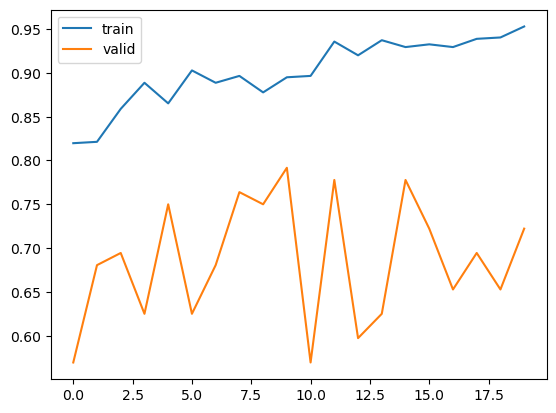

In [51]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='valid')
plt.legend()
plt.show()


In [54]:
model.save(r"C:\Users\Admin\Desktop\qozber_maednos\coriander_parsley_model.keras")